In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets

In [6]:

import tensorflow_hub as hub

In [7]:
import os
import PIL
import cv2

In [8]:
import pathlib

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datasets=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True,cache_dir='.')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
data_dir=pathlib.Path(r'/content/datasets/flower_photos')
data_dir


PosixPath('/content/datasets/flower_photos')

In [11]:
flower_dict={
    'roses':list(data_dir.glob(str('roses/*'))),
    'daisy':list(data_dir.glob(str('daisy/*'))),
    'sunflower':list(data_dir.glob(str('sunflower/*'))),
    'dandelion':list(data_dir.glob(str('dandelion/*'))),
    'tulips':list(data_dir.glob(str('tulips/*')))
}

In [12]:
flower_dict['roses'][:5]

[PosixPath('/content/datasets/flower_photos/roses/7820626638_3e2d712303.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5060519573_c628547e20_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg')]

In [13]:
flower_label={
    'roses':0,
    'daisy':1,
    'sunflower':2,
    'dandelion':3,
    'tulips':4
}

In [14]:
x=[]
y=[]
for name,image in flower_dict.items():
  for i in image:
    img=cv2.imread(str(i))
    resize_img=cv2.resize(img,(224,224))
    x.append(resize_img)
    y.append(flower_label[name])

array([[[ 62,  92, 165],
        [ 60,  88, 159],
        [ 63,  88, 160],
        ...,
        [  9,  97, 168],
        [ 11, 109, 173],
        [ 33,  45, 124]],

       [[ 60,  88, 159],
        [ 62,  89, 158],
        [ 66,  92, 161],
        ...,
        [  5, 100, 170],
        [ 18, 104, 170],
        [ 24,  39, 117]],

       [[ 59,  85, 153],
        [ 63,  89, 155],
        [ 66,  91, 157],
        ...,
        [  6, 106, 174],
        [ 19,  85, 155],
        [ 16,  33, 112]],

       ...,

       [[  0, 137, 202],
        [  1, 124, 196],
        [  1, 101, 180],
        ...,
        [  9,  52, 169],
        [ 10,  53, 171],
        [  8,  51, 168]],

       [[ 11, 124, 197],
        [  8, 100, 181],
        [  4,  72, 163],
        ...,
        [ 14,  52, 171],
        [ 13,  50, 170],
        [ 10,  46, 165]],

       [[  3, 107, 186],
        [  0,  76, 164],
        [  0,  59, 155],
        ...,
        [ 16,  49, 172],
        [ 12,  45, 167],
        [ 12,  43, 164]]], dtype=uint8)
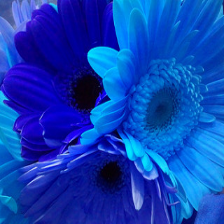

In [15]:
x[4]

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
x=x/255

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train=x_train.reshape(-1,224,224,3)
x_test=x_test.reshape(-1,224,224,3)

In [21]:
x_train.shape

(2376, 224, 224, 3)

In [ ]:
#transfer learning steps

In [ ]:
#"https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" use this "classification" type link if the need is just to classify but not train

In [22]:
import tensorflow_hub as hub

In [23]:
transfer_model_link="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
transfer_model=hub.KerasLayer(transfer_model_link,input_shape=(224,224,3),trainable=False)
#here the model will be imported without the final layer(output layer), top layers of model is freezed and the weights are not changed during the training process

In [24]:
import tf_keras

In [25]:
num_of_flowers = 5

mnet =tf_keras.Sequential([
  transfer_model,
  tf_keras.layers.Dense(num_of_flowers)
])

In [38]:
mnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # can use tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True) so that model will apply softmax before calculating the loss, it is relatively better than the one in the code
    metrics=['accuracy']
)

mnet.fit(x_train,y_train,epochs=5)

Epoch 1/5
75/75 [==============================] - 108s 1s/step - loss: 0.7557 - accuracy: 0.9331
Epoch 2/5
75/75 [==============================] - 103s 1s/step - loss: 0.9227 - accuracy: 0.9364
Epoch 3/5
75/75 [==============================] - 100s 1s/step - loss: 1.0297 - accuracy: 0.8918
Epoch 4/5
75/75 [==============================] - 98s 1s/step - loss: 1.0256 - accuracy: 0.9150
Epoch 5/5
75/75 [==============================] - 97s 1s/step - loss: 1.1509 - accuracy: 0.8969


In [ ]:
# prompt: what is the difference between "activating the final layer of the pretrained model by softmax" and " doing (from_logits=True) in the sparse catgoricalcrossentropy feaure

num_of_flowers = 5

mnet = tf_keras.Sequential([
  transfer_model,
  tf_keras.layers.Dense(num_of_flowers, activation='softmax') # Add softmax here
])
mnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
mnet.evaluate(x_test,y_test)

19/19 [==============================] - 27s 1s/step - loss: 0.2933 - accuracy: 0.8975


[0.2933264672756195, 0.8974789977073669]

In [28]:
y_pred=mnet.predict(x_test)

19/19 [==============================] - 26s 1s/step


In [29]:
y_preds=[np.argmax(i) for i in y_pred]
y_preds[:5]

[4, 1, 4, 0, 3]

In [30]:
y_test[:5]

array([4, 1, 4, 0, 3])

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print("classification report is \n\n",classification_report(y_test,y_preds))

classification report is 

               precision    recall  f1-score   support

           0       0.80      0.94      0.87       145
           1       0.89      0.92      0.90       118
           3       0.95      0.93      0.94       172
           4       0.96      0.81      0.87       160

    accuracy                           0.90       595
   macro avg       0.90      0.90      0.90       595
weighted avg       0.90      0.90      0.90       595



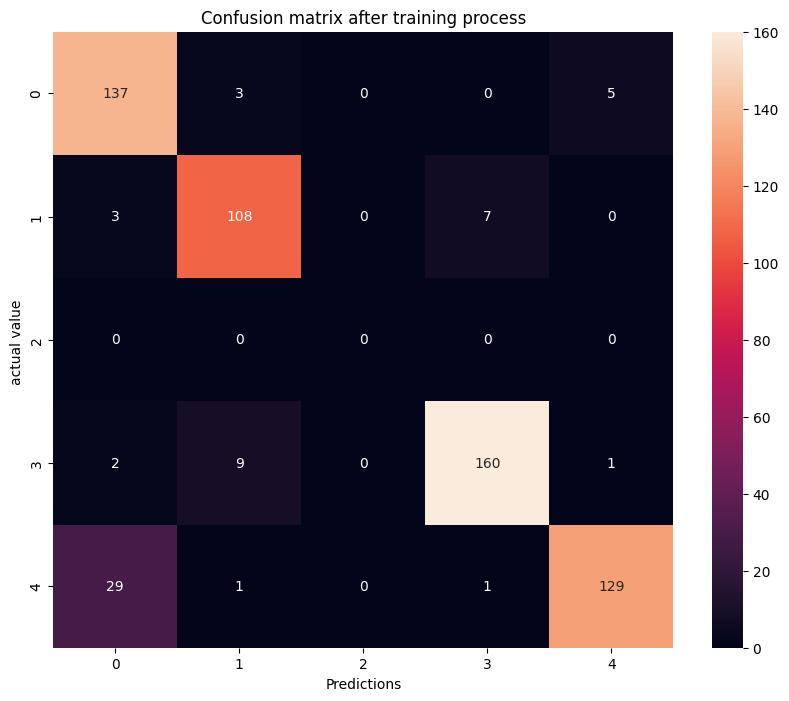

In [33]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('actual value ')
plt.title('Confusion matrix after training process')
plt.show()

In [34]:
#project completed :)